In [1]:
### Dynamical Friction in a Plummer Sphere - Analysis Code ###

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Section 1 ## 

# - Setting of useful parameters (Nparticles,TotMass,ScaleRadiusSphere,Nsnapshots)
# - Read and order the name of the generated files
# - Selection of the snapshots to analyze

In [4]:
## Number of bodies (particles+perturber), scale radius, Plummer's sphere mass, perturber's mass
Nbodies,r_scale,M,M_pert = np.loadtxt('system_properties_perturber.txt') 
Nbodies = int(Nbodies)
Nparticles = Nbodies-1

m = M/Nparticles # mass of a single particle
M_tot = M+M_pert

Ndimensions = 3 
Nlines_in_snapshot = 3+4*Nbodies # Nbodies(1row)+Ndimensions(1)+time(1)+mass_bodies(N)+
                                    # +positions(N)+velocities(N)+potential_energy(N)

In [5]:
## Reading the name of the generated files (output of 'treecode') and order them chronologically (each one
## is the system description at a given snapshot)

import glob, os
import re # regular expression

path_data = '/home/efrem/Astronomia_extragalattica/2-NBodySimulations/6-Dinamical_Friction_(alg:treecodeBarnes)/disturbatore_M=0.03/data_dist_0.03'
data_files = []
os.chdir(path_data)
for file in glob.glob("*.data"): # selection of the directory's files that end with '.data'
    data_files.append(file)

# 'data_files' contains the output 'treecode' files name; each file contains the state of the system at 
# a given time; since the files in 'data_files' are not in chronologically ordered, here a code to do that
 
def chronological_order(list):
    search_num = re.compile('(^\d+)') # regular expresion: '^' start from the string beginning, 
                                      #'\d' select the first number of the string,  '+' select all
                                      #the numbers of the string
    number_to_name = []
    for i in list:
        l = search_num.search(i)
        number = int(l.group(1))
        number_to_name.append(number)
    number_to_name = sorted(number_to_name)
    # add .data
    for i in range(len(number_to_name)):
        number_to_name[i]=('{}.data'.format(number_to_name[i]))
    return (number_to_name)

data_files = chronological_order(data_files)

In [6]:
# Number of Snapshots
Nsnapshots = len(data_files)
Nsnapshots = int(Nsnapshots)

In [7]:
###################################################################################################################

In [8]:
## Selection of the snapshots to analyze
# Here you can choose the number of snapshots that you want to analyze. The code is very performant, 
# so we suggest to analyze all of them ('step=1'). If, however, you want to select some of them you 
# can modify the 'step' values or you can manually select the ones needed (commented part)

sn = 0
step = 1 # if 1, analyze all the snapshots
selected_snapshot = []
for i in range(int(Nsnapshots/step)):
    selected_snapshot.append(step*i)

# Manual selection
#selected_snapshot = [0,Nsnapshots-1] # this is an example, where we analyze the first and the last snaphots

print('The total number of snapshots is:,',Nsnapshots)
print('\nThe selected snapshots are: ',selected_snapshot)
print('\nYou want to analyze {} snapshots'.format(len(selected_snapshot)))

The total number of snapshots is:, 161

The selected snapshots are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]

You want to analyze 161 snapshots


In [9]:
###################################################################################################################

In [10]:
## Section 2 ## 

# - Definition and filling of the time array 

In [11]:
t = np.empty([len(selected_snapshot)])
for i_snapshot in range(len(selected_snapshot)):
    file_name = data_files[selected_snapshot[i_snapshot]]
    initial_line_time = 2
    t[i_snapshot] = np.genfromtxt(file_name,skip_header=initial_line_time,max_rows=1)

In [12]:
###################################################################################################################

In [13]:
## Section 3 ##

# - Positions of the bodies in the system 
# - Plot of the evolution of the perturber's coordinates and of its distance from (0,0,0)

In [14]:
positions = np.empty([len(selected_snapshot),Nbodies,Ndimensions])

for i_snapshot in range(len(selected_snapshot)):
    file_name = data_files[selected_snapshot[i_snapshot]]
    initial_line_position = 3+Nbodies 
    positions[i_snapshot] = np.genfromtxt(file_name,skip_header=initial_line_position,max_rows=Nbodies)

x = np.empty([len(selected_snapshot),Nbodies])
y = np.empty([len(selected_snapshot),Nbodies])
z = np.empty([len(selected_snapshot),Nbodies])
dist = np.empty([len(selected_snapshot),Nbodies]) # particles' distance from (0,0,0) at each time

for i_snapshot in range(len(selected_snapshot)):
    for i_particle in range(Nbodies):
        x[i_snapshot,i_particle] = positions[i_snapshot][i_particle][0]
        y[i_snapshot,i_particle] = positions[i_snapshot][i_particle][1]
        z[i_snapshot,i_particle] = positions[i_snapshot][i_particle][2]
dist = pow(x**2+y**2+z**2,0.5)
        
del positions # free up memory

In [15]:
## Perturber position and distance respect to the center (0,0,0) at each selected snapshot

# We write the initial_condition_file_perturber.txt such that the perturber is considered as the 
# 'first particle' because, in this way, we know what are the lines that we need to read from the output 
# data to have information  about it
x_pert = np.empty([len(selected_snapshot)])
y_pert = np.empty([len(selected_snapshot)])
z_pert = np.empty([len(selected_snapshot)])
dist_pert = np.empty([len(selected_snapshot)])

for i_snapshot in range(len(selected_snapshot)):
    x_pert[i_snapshot] = x[i_snapshot,0]
    y_pert[i_snapshot] = y[i_snapshot,0]
    z_pert[i_snapshot] = z[i_snapshot,0]
    
dist_pert = pow((x_pert**2+y_pert**2+z_pert**2),0.5)

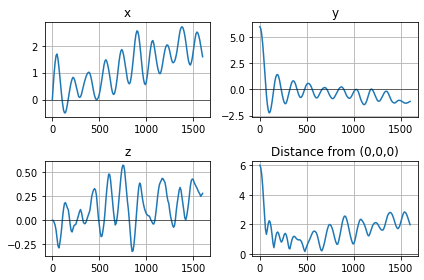

In [16]:
## Plot of the evolution of the (x,y,z) perturber's coordinates and of its distande respect to (0,0,0)
# This plot is made only here in the notebook in order to have in a single plot an idea of what is 
# happening to the perturber's position (we note that a description of the system from the center of mass 
# will be better since, for example, the x coordinate, while oscillating, has a global motion)

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(t, x_pert)
axs[0, 0].grid()
axs[0, 0].axhline(0,0,1,c='k',ls='-',lw=0.5)
axs[0, 0].set_title("x")

axs[1, 0].plot(t, z_pert)
axs[1, 0].grid()
axs[1, 0].axhline(0,0,1,c='k',ls='-',lw=0.5)
axs[1, 0].set_title("z")


axs[0, 1].plot(t, y_pert)
axs[0, 1].grid()
axs[0, 1].axhline(0,0,1,c='k',ls='-',lw=0.5)
axs[0, 1].set_title("y")

axs[1, 1].plot(t,dist_pert)
axs[1, 1].grid()
axs[1, 1].axhline(0,0,1,c='k',ls='-',lw=0.5)
axs[1, 1].set_title("Distance from (0,0,0)")

fig.tight_layout()

In [17]:
## The following plots are the same of the previous one (in a sense it's a repetition but the aims are 
## different: the plots above are used to have an overview, the plots below are bigger and so clearer 
## and are saved)

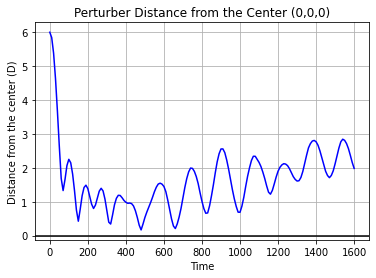

In [18]:
## Plot of the Perturber distance respect to (0,0,0) over time
plt.plot(t,dist_pert,color='b')

plt.axhline(0,0,1,c='k',ls='-')

plt.title('Perturber Distance from the Center (0,0,0)')
plt.xlabel('Time')
plt.ylabel('Distance from the center (D)')

plt.grid()
#plt.savefig('PerturberDistance_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

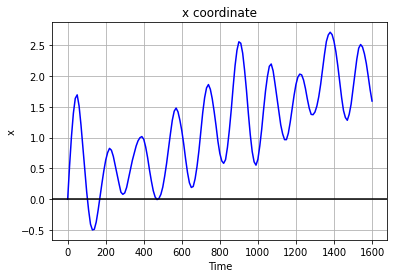

In [19]:
# Plot of the evolution of the x coordinate of the perturber over time 
plt.plot(t,x_pert,c='b')

plt.axhline(0,0,1,c='k',ls='-')

plt.title('x coordinate')
plt.xlabel('Time')
plt.ylabel('x')

plt.grid()
#plt.savefig('Perturber_x_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

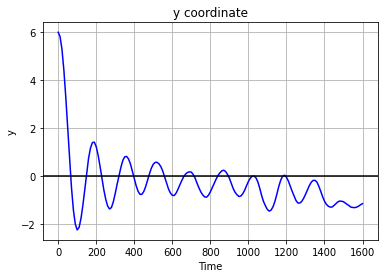

In [20]:
# Plot of the evolution of the y coordinate of the perturber over time 
plt.plot(t,y_pert,c='b')

plt.axhline(0,0,1,c='k',ls='-')

plt.title('y coordinate')
plt.xlabel('Time')
plt.ylabel('y')

plt.grid()
#plt.savefig('Perturber_y_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale))

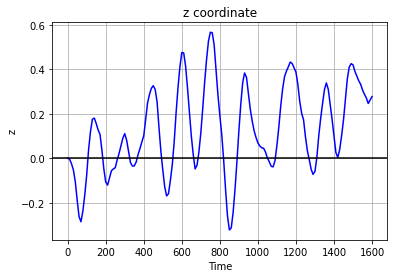

In [21]:
# Plot of the evolution of the z coordinate of the perturber over time 
plt.plot(t,z_pert,c='b')

plt.axhline(0,0,1,c='k',ls='-')

plt.title('z coordinate')
plt.xlabel('Time')
plt.ylabel('z')

plt.grid()
#plt.savefig('Perturber_z_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale))

In [22]:
# Before analyzing the system properties, we need to change the reference frame from (0,0,0) to the 
# center of mass

In [23]:
###################################################################################################################

In [24]:
## Section 4 ##

# - Computation of the System Center of Mass evolution (CoM where all the bodies are considered, CoM where 
#   only bodies within LagRad80 are considerd, CoM where only particles (perturber excluded) within 
#   LagRad80 are considered)

In [25]:
## Center of mass 

In [26]:
# N = len(selected_snapshot), R = distance vector (only particles with r<=R are considered in the 
# computation) (ex. R = LagRad80). If you want to consider all particles: 
# R = np.ones([len(selected_snapshot)])*np.max((np.sort(dist)[-1]))

def CoM(N,Nbodies,R,x,y,z,dist,mass_bodies): 
    M_tot = np.sum(mass_bodies)               
    CoM_x = np.empty([N])                                                                  
    CoM_y = np.empty([N])
    CoM_z = np.empty([N])
    for i_snapshot in range(N):
        c_x = 0
        c_y = 0
        c_z = 0
        for i_particle in range(Nbodies): 
            if dist[i_snapshot][i_particle] <= (R[i_snapshot]):
                c_x = c_x + x[i_snapshot,i_particle]*mass_bodies[i_particle]
                c_y = c_y + y[i_snapshot,i_particle]*mass_bodies[i_particle]
                c_z = c_z + z[i_snapshot,i_particle]*mass_bodies[i_particle]
        CoM_x[i_snapshot] = c_x
        CoM_y[i_snapshot] = c_y
        CoM_z[i_snapshot] = c_z    
    CoM_x = CoM_x/M_tot
    CoM_y = CoM_y/M_tot
    CoM_z = CoM_z/M_tot
    dist_CoM = pow(CoM_x**2+CoM_y**2+CoM_z**2,0.5)
    return CoM_x,CoM_y,CoM_z,dist_CoM

In [27]:
mass_bodies = np.ones(Nparticles)*m
mass_bodies = np.insert(mass_bodies,0,M_pert)

In [28]:
# CoM where all the bodies are considered (particles and perturber)
R = np.ones([len(selected_snapshot)])*np.max((np.sort(dist)[-1]))
CoM_x,CoM_y,CoM_z,dist_CoM = CoM(len(selected_snapshot),Nbodies,R,x,y,z,dist,mass_bodies)
del R

In [29]:
## CoM of the system (only bodies within LagRad90)

LagRad90 = np.empty([len(selected_snapshot)])
sorted_distance = np.sort(np.delete(dist,0,1)) # the disturber distance is not considered
for i_snapshot in range(len(selected_snapshot)):
    LagRad90[i_snapshot] = sorted_distance[i_snapshot][int(0.9*Nparticles)-1]

R = LagRad90
CoM_x2,CoM_y2,CoM_z2,dist_CoM2 = CoM(len(selected_snapshot),Nbodies,R,x,y,z,dist,mass_bodies)
del R

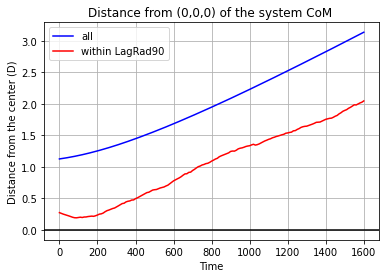

In [30]:
plt.plot(t,dist_CoM,c='b',label='all')
plt.plot(t,dist_CoM2,c='r',label='within LagRad90')

plt.axhline(0,0,1,c='k',ls='-')

plt.title('Distance from (0,0,0) of the system CoM ')
plt.xlabel('Time')
plt.ylabel('Distance from the center (D)')

plt.legend()
plt.grid()
#plt.savefig('CoM_tot_(Np={}_M={}_Mpert{}_Rscal={}).jpg'.format(Nparticles,M,M_pert,r_scale)) 

In [31]:
###################################################################################################################

In [32]:
## Section 5 ##

# - Change of reference frame in positions and velocities. 
#   From (0,0,0) to the Center of mass of the system (only bodies within LagRad90 are considered)
# - Plot of the evolution of the new and old CoM (to verify if we succeded in our change of R.F.)

In [33]:
## Positions and velocities translation

In [34]:
R = LagRad90
CoM_x,CoM_y,CoM_z,dist_CoM = CoM(len(selected_snapshot),Nbodies,R,x,y,z,dist,mass_bodies)
del R

CoM_x_old = CoM_x
CoM_y_old = CoM_y
CoM_z_old = CoM_z
dist_CoM_old = dist_CoM

In [35]:
## Before changing the position reference frame (translating the system in the CoM computed considering 
## the bodies within LagRad90), we change the velocity reference frame (we compute at each snapshot the
## velocity of the CoM (bodies within LagRad90))

In [36]:
# Definition of the velocities respect to the original reference frame
velocities = np.empty([len(selected_snapshot),Nbodies,Ndimensions])

for i_snapshot in range(len(selected_snapshot)):
    file_name = data_files[selected_snapshot[i_snapshot]]
    initial_line_velocity = 3+2*Nbodies 
    velocities[i_snapshot] = np.genfromtxt(file_name,skip_header=initial_line_velocity,max_rows=Nbodies)

vx = np.empty([len(selected_snapshot),Nbodies])
vy = np.empty([len(selected_snapshot),Nbodies])
vz = np.empty([len(selected_snapshot),Nbodies])
modV = np.empty([len(selected_snapshot),Nbodies]) 

for i_snapshot in range(len(selected_snapshot)):
    for i_particle in range(Nbodies):
        vx[i_snapshot,i_particle] = velocities[i_snapshot][i_particle][0]
        vy[i_snapshot,i_particle] = velocities[i_snapshot][i_particle][1]
        vz[i_snapshot,i_particle] = velocities[i_snapshot][i_particle][2]
modV = pow(vx**2+vy**2+vz**2,0.5)
        
del velocities # free up memory

In [37]:
## Velocity of the center of mass that embeds the 90% of the mass
CoM_vx = np.empty([len(selected_snapshot)])
CoM_vy = np.empty([len(selected_snapshot)])
CoM_vz = np.empty([len(selected_snapshot)])
modV_CoM = np.empty([len(selected_snapshot)])

for i in range(len(selected_snapshot)):
    boolArray = dist[i]<=LagRad90[i] # selection at each snapshot of the particles needed
    a = vx[i][boolArray]
    b = vy[i][boolArray]
    c = vz[i][boolArray]
    e = mass_bodies[boolArray]    
    CoM_vx[i] = np.sum(a*e)/np.sum(e)
    CoM_vy[i] = np.sum(b*e)/np.sum(e)
    CoM_vz[i] = np.sum(c*e)/np.sum(e)

In [38]:
## Computation of the new velocity arrays
for i_snapshot in range(len(selected_snapshot)):
    vx[i_snapshot] = vx[i_snapshot]-CoM_vx[i_snapshot]
    vy[i_snapshot] = vy[i_snapshot]-CoM_vy[i_snapshot]
    vz[i_snapshot] = vz[i_snapshot]-CoM_vz[i_snapshot]
modV = pow(vx**2+vy**2+vz**2,0.5)

In [39]:
## Perturber velocity 
vx_pert = np.empty([len(selected_snapshot)])
vy_pert = np.empty([len(selected_snapshot)])
vz_pert = np.empty([len(selected_snapshot)])
mod_Vpert = np.empty([len(selected_snapshot)])

for i_snapshot in range(len(selected_snapshot)):
    vx_pert[i_snapshot] = vx[i_snapshot,0]
    vy_pert[i_snapshot] = vy[i_snapshot,0]
    vz_pert[i_snapshot] = vz[i_snapshot,0]
    
mod_Vpert = pow((vx_pert**2+vy_pert**2+vz_pert**2),0.5)

In [40]:
## Computation of the new position arrays
for i_snapshot in range(len(selected_snapshot)):
    x[i_snapshot] = x[i_snapshot]-CoM_x[i_snapshot]
    y[i_snapshot] = y[i_snapshot]-CoM_y[i_snapshot]
    z[i_snapshot] = z[i_snapshot]-CoM_z[i_snapshot]
dist = pow(x**2+y**2+z**2,0.5)

In [41]:
## Perturber position and distance respect to the center of mass of the system at each selected snapshot

# n.b. x_pert etc. already defined above
for i_snapshot in range(len(selected_snapshot)):
    x_pert[i_snapshot] = x[i_snapshot,0]
    y_pert[i_snapshot] = y[i_snapshot,0]
    z_pert[i_snapshot] = z[i_snapshot,0]    
dist_pert = pow((x_pert**2+y_pert**2+z_pert**2),0.5)

In [42]:
## Definition of the new coordinates of the apocenter and pericenter of the perturber orbit
r_apocenter = 6
r_pericenter = 2
apocenter = np.array([0,r_apocenter,0])
pericenter = np.array([0,-r_pericenter,0])

apocenter = apocenter - np.array([CoM_x[0],CoM_y[0],CoM_z[0]])
pericenter = pericenter - np.array([CoM_x[0],CoM_y[0],CoM_z[0]])

In [43]:
## Computation of the new center of mass

LagRad90 = np.empty([len(selected_snapshot)])
sorted_distance = np.sort(np.delete(dist,0,1)) # the disturber distance is not considered
for i_snapshot in range(len(selected_snapshot)):
    LagRad90[i_snapshot] = sorted_distance[i_snapshot][int(0.9*Nparticles)-1]

R = LagRad90

CoM_x,CoM_y,CoM_z,dist_CoM = CoM(len(selected_snapshot),Nbodies,R,x,y,z,dist,mass_bodies)
del R

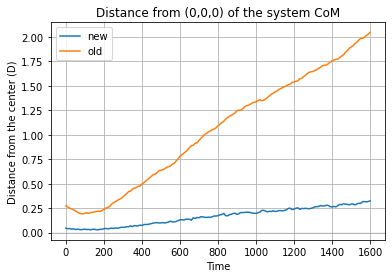

In [44]:
plt.plot(t,dist_CoM,label='new')
plt.plot(t,dist_CoM_old,label='old')

plt.axhline(0,0,1,c='k',ls='-',lw=0.1)

plt.title('Distance from (0,0,0) of the system CoM')
plt.xlabel('Time')
plt.ylabel('Distance from the center (D)')

plt.legend()
plt.grid()
#plt.savefig('CoM_system_oldnew_(Np={}_M={}_Mpert{}_Rscal={}).jpg'.format(Nparticles,M,M_pert,r_scale))

In [45]:
###################################################################################################################

In [46]:
## Section 6 ##

# Study of the evolution of the system (Plummer Sphere + Perturber) properties:
# - Energy 
# - Lagrangian Radius (perturber not included)
# - Perturber distance and velocity evolution 
# - Angular momentum (in function of time and R)
# - Density evolution 
# - Radial Distribution of particles


In [47]:
                                            #### o #### 

In [48]:
## Energy

In [49]:
potential_energy = np.empty([len(selected_snapshot),Nbodies])

initial_line_potential = 3+3*Nbodies
for i_snapshot in range(len(selected_snapshot)):
    file_name = data_files[selected_snapshot[i_snapshot]]
    potential_energy[i_snapshot] = np.genfromtxt(file_name,skip_header=initial_line_potential,
                                                 max_rows=Nbodies)

In [50]:
## Potential and Kinet energy of the system
Utot = np.sum(mass_bodies*potential_energy,1)*0.5 # to avoid double counting
Ktot = np.sum((vx**2+vy**2+vz**2)*mass_bodies,1)*0.5
Etot = Utot+Ktot

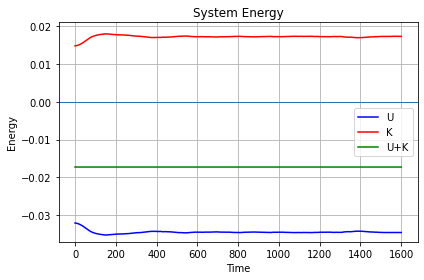

In [51]:
## Plot of the potential energy (U), kinetic energy(K), total energy(U+K) 
plt.plot(t,Utot,c='b',label='U')
plt.plot(t,Ktot,c='r',label='K')
plt.plot(t,Etot,c='g',label='U+K')
plt.ylim([-0.037,0.021])

plt.axhline(0,0,1,lw=1)

plt.title('System Energy')
plt.xlabel('Time')
plt.ylabel('Energy')

plt.legend(loc='best')
plt.grid()
plt.tight_layout()
#plt.savefig('energy_plot_(Np={}_M={}_Mpert{}_Rscal={}).jpg'.format(Nparticles,M,M_pert,r_scale)) 

In [52]:
## Potential and Kinetic energy of the sphere
Utot_sphere = np.sum(mass_bodies[1:]*np.delete(potential_energy,0,1),1)*0.5 # to avoid double counting
Ktot_sphere = np.sum((np.delete(vx,0,1)**2+np.delete(vy,0,1)**2+np.delete(vz,0,1)**2)
                     *mass_bodies[1:],1)*0.5
Etot_sphere = Utot_sphere+Ktot_sphere

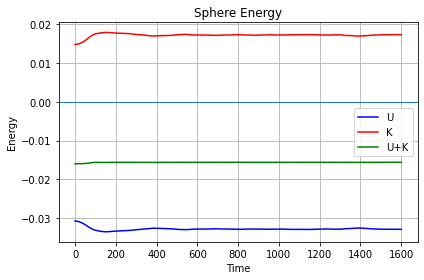

In [53]:
## Plot of the potential energy (U), kinetic energy(K), total energy(U+K)
plt.plot(t,Utot_sphere,c='b',label='U')
plt.plot(t,Ktot_sphere,c='r',label='K')
plt.plot(t,Etot_sphere,c='g',label='U+K')

plt.axhline(0,0,1,lw=1)

plt.title('Sphere Energy')
plt.xlabel('Time')
plt.ylabel('Energy')

plt.grid()
plt.legend(loc='best')
plt.tight_layout()

In [54]:
## The two plots below are made only dor M_pert=0.03

<ipython-input-55-90a3c8aef077>:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(122,-0.0159),s=r'$\Delta={:1.1}$'.format(deltaE_sphere),rotation=90,fontsize=14)


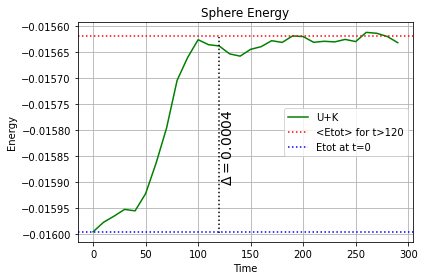

In [55]:
## Plot of the evolution of the sphere's total energy

mean_sphere = np.mean(Etot_sphere[t>=120])
deltaE_sphere = mean_sphere-Etot_sphere[0]

plt.plot(t[t<=300],Etot_sphere[t<=300],c='g',label='U+K')
plt.axhline(mean_sphere,0,1,ls=':',c='r',label='<Etot> for t>120')
plt.axhline(Etot_sphere[0],0,1,ls=':',c='b',label='Etot at t=0')
plt.axvline(120,0.04,mean_sphere+0.95,ls=':',c='k')
plt.annotate(xy=(122,-0.0159),s=r'$\Delta={:1.1}$'.format(deltaE_sphere),rotation=90,fontsize=14)

plt.title('Sphere Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('Sphere_energy_plot_(Np={}_M={}_Mpert{}_Rscal={}).jpg'.format(Nparticles,M,M_pert,r_scale)) 

In [56]:
## Kinetic and Potential energy of the perturber
U_pert = np.empty([len(selected_snapshot)])
for i in range(len(selected_snapshot)):
    U_pert[i] = potential_energy[i][0]
U_pert = U_pert*M_pert

K_pert = 0.5*M_pert*(vx_pert**2+vy_pert**2+vz_pert**2)
Etot_pert = U_pert+K_pert

<ipython-input-57-30f6db96db5b>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(122,-0.0031),s=r'$\Delta={:1.1}$'.format(deltaE_pert),rotation=90,fontsize=14)


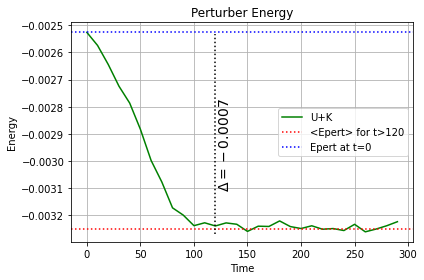

In [57]:
## Plot of the evolution of the perturber's total energy
mean_pert = np.mean(Etot_pert[t>=120])
deltaE_pert = mean_pert-Etot_pert[0]

plt.plot(t[t<=300],Etot_pert[t<=300],c='g',label='U+K')
plt.axhline(mean_pert,0,1,ls=':',c='r',label='<Epert> for t>120')
plt.axhline(Etot_pert[0],0,1,ls=':',c='b',label='Epert at t=0')
plt.axvline(120,0.035,mean_pert+0.95,ls=':',c='k')
plt.annotate(xy=(122,-0.0031),s=r'$\Delta={:1.1}$'.format(deltaE_pert),rotation=90,fontsize=14)

plt.title('Perturber Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('Perturber_energy_plot_(Np={}_M={}_Mpert{}_Rscal={}).jpg'.format(Nparticles,M,M_pert,r_scale)) 

In [58]:
                                            #### o #### 

In [59]:
## Lagrangian Radius of the sphere (we do not consider the perturber)

In [60]:
p = [20,40,60,80,90] # lagrangian radius that contain that percentage of mass

# definition of the lagrangian radius
for perc in p:
     globals()['LagRad'+str(perc)] = np.empty([len(selected_snapshot)])

sorted_distance = np.sort(np.delete(dist,0,1)) # the disturber distance is not considered

# filling of the lagrangian radius
for i_snapshot in range(len(selected_snapshot)):
    for perc in p:
         (globals()['LagRad'+str(perc)])[i_snapshot] = (sorted_distance
                                                        [i_snapshot][int(perc/100*Nparticles)-1])

# Since we observe a contraction of the sphere, we want to find for each LagRad the minimum distance from the 
# center and when it happens

for perc in p:    
    globals()['Lag'+str(perc)+'Min'] = []
    globals()['Lag'+str(perc)+'Min'].append(np.min(globals()['LagRad'+str(perc)]))
    index = globals()['LagRad'+str(perc)]==globals()['Lag'+str(perc)+'Min']
    globals()['Lag'+str(perc)+'Min'].insert(0,(t[index])[0])

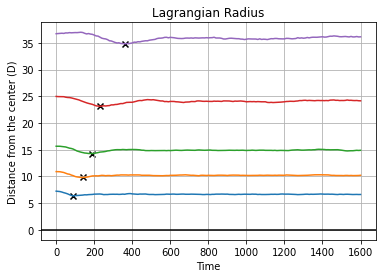

In [61]:
## Plot of the Lagrangian radius
for perc in p: 
    plt.plot(t,globals()['LagRad'+str(perc)],label='{}%'.format(perc))
    a = (globals()['Lag'+str(perc)+'Min'])[0]
    b = (globals()['Lag'+str(perc)+'Min'])[1]
    plt.scatter(a,b,marker='x',color='k')

plt.axhline(0,0,1,c='k',ls='-')

plt.title('Lagrangian Radius')
plt.xlabel('Time')
plt.ylabel('Distance from the center (D)')

plt.grid()
#plt.savefig('LagrangianRadius_(Np={}_M={}_Mpert{}_Rscal={}).jpg'.format(Nparticles,M,M_pert,r_scale)) 

In [62]:
                                            #### o #### 

In [63]:
## Perturber distance respect to the CoM

In [64]:
dist_apo = pow(np.sum((apocenter**2)),0.5)
dist_per = pow(np.sum((pericenter**2)),0.5)
# The perturber orbit, without dynamical friction, will be within [dist_pericenter,dist_apocenter]

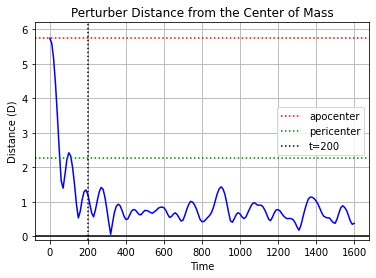

In [65]:
plt.plot(t,dist_pert,color='b')
plt.ylim([-0.1,6.2])

plt.axhline(0,0,1,c='k',ls='-')
plt.axhline(dist_apo,0,1,c='r',ls=':',label='apocenter')
plt.axhline(dist_per,0,1,c='g',ls=':',label='pericenter')
#plt.axvline(500,0,1,c='k',ls=':',label='t=500') # for M_pert=0.01
plt.axvline(200,0,1,c='k',ls=':',label='t=200') # for M_pert=0.03


plt.title('Perturber Distance from the Center of Mass')
plt.xlabel('Time')
plt.ylabel('Distance (D)')


plt.grid()
plt.legend()

#plt.savefig('PerturberDistanceFromCoM_def_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

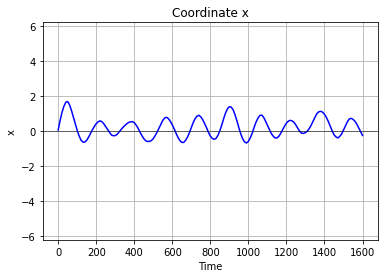

In [66]:
plt.plot(t,x_pert,c='b')
plt.ylim([-6.2,6.2])

plt.axhline(0,0,1,lw=0.5,c='k')

plt.title('Coordinate x')
plt.xlabel('Time')
plt.ylabel('x')

plt.grid()
#plt.savefig('PerturberX_def_Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

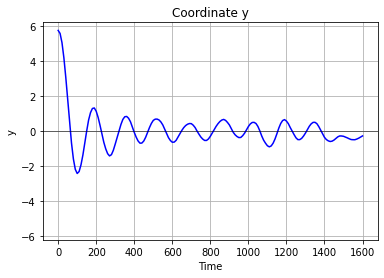

In [67]:
plt.plot(t,y_pert,c='b')
plt.ylim([-6.2,6.2])

plt.axhline(0,0,1,lw='0.5',c='k')

plt.title('Coordinate y')
plt.xlabel('Time')
plt.ylabel('y')

plt.grid()
#plt.savefig('PerturberY_def_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

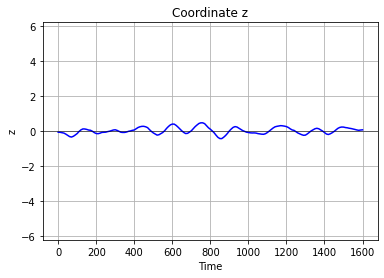

In [68]:
plt.plot(t,z_pert,c='b')

plt.axhline(0,0,1,lw='0.5',c='k')

plt.ylim([-6.2,6.2])

plt.title('Coordinate z')
plt.xlabel('Time')
plt.ylabel('z')

plt.grid()
#plt.savefig('PerturberZ_def_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

In [69]:
## Finding the Lagrangian Radius that include the final orbit of the perturber

# lagrangian radius that contain that percentage of mass
#p = [0.03,0.9] # for M_pert=0.01
p = [0.01,0.25] # for M_pert=0.03

# definition of the lagrangian radius
for perc in p:
     globals()['LagRad'+str(perc)] = np.empty([len(selected_snapshot)])

sorted_distance = np.sort(np.delete(dist,0,1)) # the disturber distance is not considered

# filling of the lagrangian radius
for i_snapshot in range(len(selected_snapshot)):
    for perc in p:
         (globals()['LagRad'+str(perc)])[i_snapshot] = (sorted_distance
                                                        [i_snapshot][int(perc/100*Nparticles)-1])

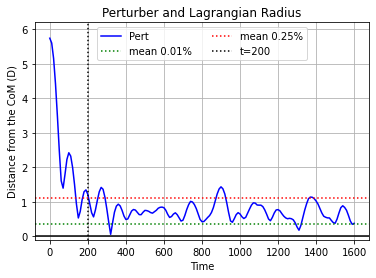

In [70]:
## Plot of the Lagrangian radius
plt.plot(t,dist_pert,color='b',label='Pert')
plt.ylim([-0.1,6.2])

c = []
for perc in p: 
    c.append(np.mean( (globals()['LagRad'+str(perc)])[t>200]  ))
plt.axhline(c[0],0,1,ls=':',c='g',label='mean {}%'.format(p[0]))   
plt.axhline(c[1],0,1,ls=':',c='r',label='mean {}%'.format(p[1])) 
plt.axhline(0,0,1,c='k',ls='-')
#plt.axvline(500,0,1,c='k',ls=':',label='t=500') # for M_pert=0.01
plt.axvline(200,0,1,c='k',ls=':',label='t=200') # for M_pert=0.03

plt.title('Perturber and Lagrangian Radius')
plt.xlabel('Time')
plt.ylabel('Distance from the CoM (D)')

plt.grid()
plt.legend(ncol=2,loc=9)

#plt.savefig('LagrangianRadiusPerturber_(Np={}_M={}_Mpert{}_Rscal={}).jpg'.format(Nparticles,M,M_pert,r_scale)) 

In [71]:
## Selection of a random particle anstudy of its distance evolution over time
index = np.random.randint(0, Nparticles-1) # random selection

x_sample = np.empty([len(selected_snapshot)])
y_sample = np.empty([len(selected_snapshot)])
z_sample = np.empty([len(selected_snapshot)])
dist_sample = np.empty([len(selected_snapshot)])

for i_snapshot in range(len(selected_snapshot)):
    x_sample[i_snapshot] = x[i_snapshot,index]
    y_sample[i_snapshot] = y[i_snapshot,index]
    z_sample[i_snapshot] = z[i_snapshot,index]    
dist_sample = pow((x_sample**2+y_sample**2+z_sample**2),0.5)

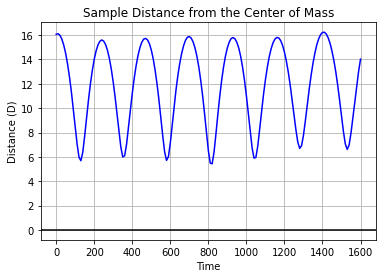

In [72]:
plt.plot(t,dist_sample,color='b')

plt.axhline(0,0,1,c='k',ls='-')

plt.title('Sample Distance from the Center of Mass')
plt.xlabel('Time')
plt.ylabel('Distance (D)')

plt.grid()

#plt.savefig('SamplerDistanceFromCoM_def_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

In [73]:
                                            #### o #### 

In [74]:
## Perturber velocity 

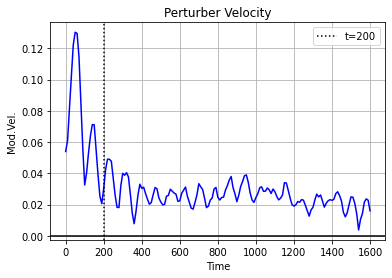

In [75]:
plt.plot(t,mod_Vpert,color='b')

#plt.axvline(500,0,1,c='k',ls=':',label='t=500') # for M_pert=0.01
plt.axvline(200,0,1,c='k',ls=':',label='t=200') # for M_pert=0.03
plt.axhline(0,0,1,c='k',ls='-')

plt.title('Perturber Velocity')
plt.xlabel('Time')
plt.ylabel('Mod.Vel.')

plt.legend()
plt.grid()
#plt.savefig('PerturberVelocity_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

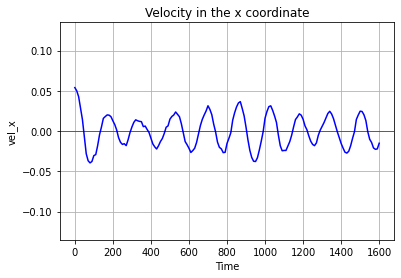

In [76]:
plt.plot(t,vx_pert,c='b')
plt.ylim([-0.135,0.135])

plt.axhline(0,0,1,lw=0.5,c='k')

plt.title('Velocity in the x coordinate')
plt.xlabel('Time')
plt.ylabel('vel_x')

plt.grid()
#plt.savefig('PerturberVX_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

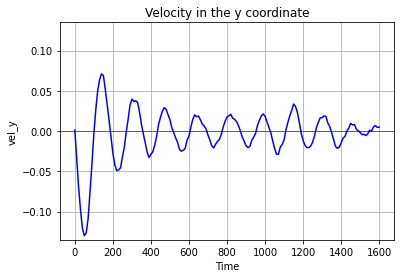

In [77]:
plt.plot(t,vy_pert,c='b')
plt.ylim([-0.135,0.135])

plt.axhline(0,0,1,lw=0.5,c='k')

plt.title('Velocity in the y coordinate')
plt.xlabel('Time')
plt.ylabel('vel_y')

plt.grid()
#plt.savefig('PerturberVY_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

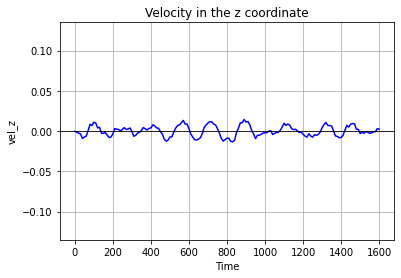

In [78]:
plt.plot(t,vz_pert,c='b')
plt.ylim([-0.135,0.135])

plt.axhline(0,0,1,c='k',ls='-',lw=0.5)
plt.axhline(0,0,1,lw=0.6,c='k')

plt.title('Velocity in the z coordinate')
plt.xlabel('Time')
plt.ylabel('vel_z')

plt.grid()
#plt.savefig('PerturberVZ_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

In [79]:
                                            #### o #### 

In [80]:
## Angular Momentum

In [81]:
def angularMomentum(m,x,y,z,vx,vy,vz):
    Lx = (y*vz-z*vy)*m
    Ly = (z*vx-x*vz)*m
    Lz = (x*vy-y*vx)*m
    return Lx,Ly,Lz

In [82]:
## Conservation of the angular momentum of the system (all bodies considered)
# To prove the conservation of angular momentum we consider all the particles's system because some 
# of them have very elliptical orbits and so they can came to small R, subtract angular momentum to 
# the perturber and then continue on their elliptical orbits, returning far away from the CoM. If we 
# exclude some particles, we will not take care of the angular momentum that they can have gained from
# the perturber

Lx,Ly,Lz = angularMomentum(mass_bodies,x,y,z,vx,vy,vz)
Lmod_tot = pow(np.sum(Lx,1)**2+np.sum(Ly,1)**2+np.sum(Lz,1)**2,0.5)
Lmod_mean = np.mean(Lmod_tot)

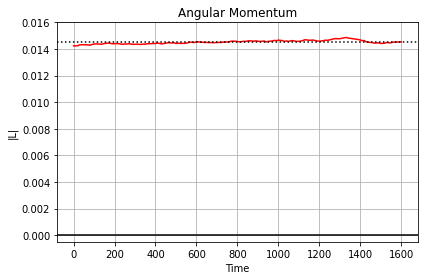

In [83]:
plt.plot(t,Lmod_tot,color='r')
plt.ylim([-0.0005,0.016])

plt.axhline(Lmod_mean,0,1,c='k',ls=':')
plt.axhline(0,0,1,c='k',ls='-')

plt.title('Angular Momentum')
plt.xlabel('Time')
plt.ylabel('|L|')

plt.tight_layout()
plt.grid()
#plt.savefig('AngularMomentumTot_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

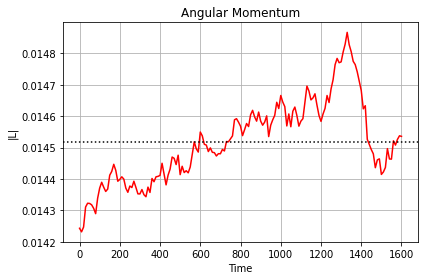

In [84]:
plt.plot(t,Lmod_tot,color='r')

plt.axhline(Lmod_mean,0,1,c='k',ls=':')

plt.title('Angular Momentum')
plt.xlabel('Time')
plt.ylabel('|L|')

plt.tight_layout()
plt.grid()
#plt.savefig('AngularMomentumTot2_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

In [85]:
## Perturber angular momentum in time
Lx_pert,Ly_pert,Lz_pert = angularMomentum(M_pert,x_pert,y_pert,z_pert,vx_pert,vy_pert,vz_pert)
Lmod_pert = pow(Lx_pert**2+Ly_pert**2+Lz_pert**2,0.5)

In [86]:
## Particles angular momentum in time 
Lx,Ly,Lz = angularMomentum(mass_bodies[1:],np.delete(x,0,1),np.delete(y,0,1),np.delete(z,0,1),
                           np.delete(vx,0,1),np.delete(vy,0,1),np.delete(vz,0,1)) # we delete the perturbers 
                                                                                  # data from the arrays
Lmod_tot = pow(np.sum(Lx,1)**2+np.sum(Ly,1)**2+np.sum(Lz,1)**2,0.5)

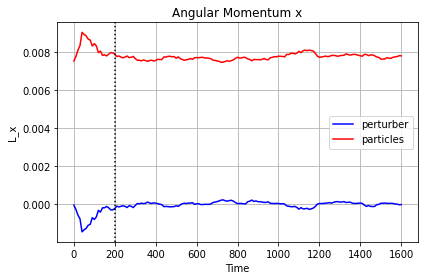

In [87]:
a = np.sum(Lx,1)
plt.plot(t,Lx_pert,color='b',label='perturber')
plt.plot(t,a,color='r',label='particles')

#plt.axvline(500,0,1,c='k',ls=':') # for M_pert=0.01
plt.axvline(200,0,1,c='k',ls=':') # for M_pert=0.03

plt.title('Angular Momentum x')
plt.xlabel('Time')
plt.ylabel('L_x')

plt.tight_layout()
plt.grid()
plt.legend()
#plt.savefig('AngularMomentum_x_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

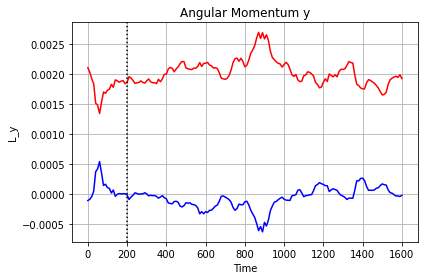

In [88]:
a = np.sum(Ly,1)
plt.plot(t,Ly_pert,color='b',label='perturber')
plt.plot(t,a,color='r',label='particles')

#plt.axvline(500,0,1,c='k',ls=':') # for M_pert=0.01
plt.axvline(200,0,1,c='k',ls=':') # for M_pert=0.03

plt.title('Angular Momentum y')
plt.xlabel('Time')
plt.ylabel('L_y')

plt.tight_layout()
plt.grid()
#plt.savefig('AngularMomentum_y_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

<ipython-input-89-79b60b801703>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(1130,-0.002),s=r'$\Delta perturber={:1.2}$'.format(delta_pert),rotation=0,fontsize=10)
<ipython-input-89-79b60b801703>:15: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(1130,-0.003),s=r'$\Delta system={:1.2}$'.format(delta_syst),rotation=0,fontsize=10)


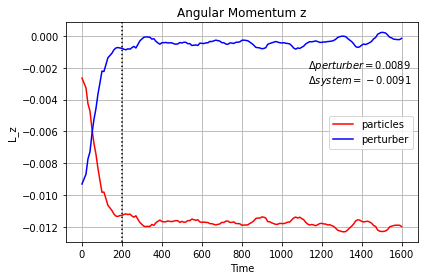

In [89]:
a = np.sum(Lz,1)
plt.plot(t,a,color='r',label='particles')
plt.plot(t,Lz_pert,color='b',label='perturber')

delta_pert = np.mean(Lz_pert[t>220])-Lz_pert[0]
delta_syst = np.mean(a[t>220])-a[0]

# for M_pert=0.01
#plt.annotate(xy=(1130,-0.0019),s=r'$\Delta perturber={:1.2}$'.format(delta_pert),rotation=0,fontsize=10)
#plt.annotate(xy=(1130,-0.0024),s=r'$\Delta system={:1.2}$'.format(delta_syst),rotation=0,fontsize=10)
#plt.axvline(500,0,1,c='k',ls=':') 

# for M_pert=0.03
plt.annotate(xy=(1130,-0.002),s=r'$\Delta perturber={:1.2}$'.format(delta_pert),rotation=0,fontsize=10)
plt.annotate(xy=(1130,-0.003),s=r'$\Delta system={:1.2}$'.format(delta_syst),rotation=0,fontsize=10)
plt.axvline(200,0,1,c='k',ls=':') 

plt.title('Angular Momentum z')
plt.xlabel('Time')
plt.ylabel('L_z')

plt.tight_layout()
plt.legend()
plt.grid()
#plt.savefig('AngularMomentum_z_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

In [90]:
## Angular momentum in function of R

In [91]:
def takeSecond(elem):
    return elem[1]


# a and b are joint one to one into a list which is sorted in ascending oreder respect to a
def orderAs(a,b):
    d = sorted(zip(a,b)) 
    f = []
    for i in range(len(d)):
        f.append( takeSecond(d[i]) ) 
    return np.array(f)

In [92]:
snapshot_to_check = Nsnapshots-1

# The perturber is not considered
# The arrays are ordered as the particles distance from the CoM
x_order = orderAs(dist[snapshot_to_check][1:],x[snapshot_to_check][1:]) 
y_order = orderAs(dist[snapshot_to_check][1:],y[snapshot_to_check][1:]) 
z_order = orderAs(dist[snapshot_to_check][1:],z[snapshot_to_check][1:]) 
vx_order = orderAs(dist[snapshot_to_check][1:],vx[snapshot_to_check][1:]) 
vy_order = orderAs(dist[snapshot_to_check][1:],vy[snapshot_to_check][1:]) 
vz_order = orderAs(dist[snapshot_to_check][1:],vz[snapshot_to_check][1:]) 

In [93]:
Lx,Ly,Lz = angularMomentum(mass_bodies[1:],x_order,y_order,z_order,vx_order,vy_order,vz_order)
Lmod_tot = pow(Lx**2+Ly**2+Lz**2,0.5)

In [94]:
withinR = [0,8]  #LagRad90[snapshot_to_check]*2 # al the particles within this value are considered
Npoints = 16
delta = (withinR[1]-withinR[0])/Npoints
r = [withinR[0]]
L_binX = [] # it will contain the mean angular momentum per particle in the generated bins
L_binY = []
L_binZ = []
L_binM = []
sorted_distance = np.sort(np.delete(dist,0,1)) 

for i in range(Npoints):
    r.append(withinR[0]+(i+1)*delta)
    boolArray = (r[i]<=sorted_distance[snapshot_to_check]) & (sorted_distance[snapshot_to_check]<=r[i+1])
    A = abs(Lx[boolArray])
    B = abs(Ly[boolArray])
    C = abs(Lz[boolArray])
    L_binX.append( np.mean(A) )
    L_binY.append( np.mean(B) )
    L_binZ.append( np.mean(C) )
    D = np.mean( (A**2+B**2+C**2)**0.5 )
    L_binM.append(D)

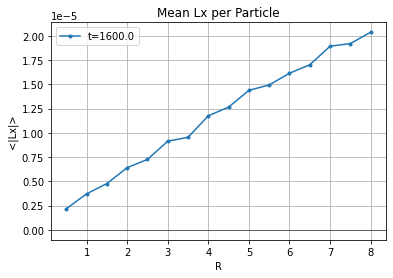

In [95]:
plt.plot(r[1:],L_binX,marker='.',label='t={:5.5}'.format(t[snapshot_to_check]))

plt.axhline(0,0,1,c='k',ls='-',lw=0.5)

plt.title('Mean Lx per Particle')
plt.xlabel('R')
plt.ylabel('<|Lx|>')

plt.grid()
plt.legend()
#plt.savefig('AngularMomentumMean_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

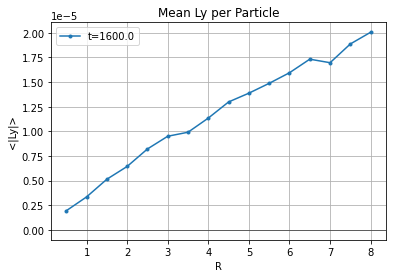

In [96]:
plt.plot(r[1:],L_binY,marker='.',label='t={:5.5}'.format(t[snapshot_to_check]))

plt.axhline(0,0,1,c='k',ls='-',lw=0.5)

plt.title('Mean Ly per Particle')
plt.xlabel('R')
plt.ylabel('<|Ly|>')

plt.grid()
plt.legend()
#plt.savefig('AngularMomentumMean_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

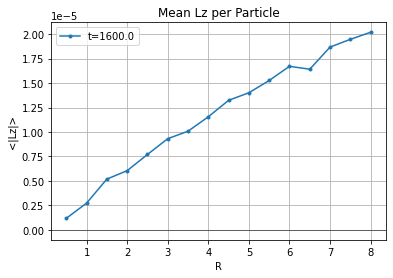

In [97]:
plt.plot(r[1:],L_binZ,marker='.',label='t={:5.5}'.format(t[snapshot_to_check]))

plt.axhline(0,0,1,c='k',ls='-',lw=0.5)

plt.title('Mean Lz per Particle')
plt.xlabel('R')
plt.ylabel('<|Lz|>')

plt.grid()
plt.legend()
#plt.savefig('AngularMomentumMean_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

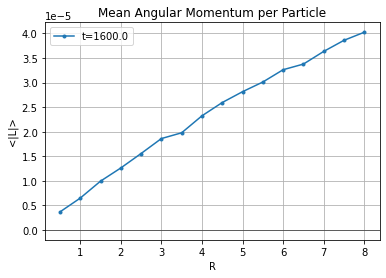

In [98]:
plt.plot(r[1:],L_binM,marker='.',label='t={:5.5}'.format(t[snapshot_to_check]))

plt.axhline(0,0,1,c='k',ls='-',lw=0.5)

plt.title('Mean Angular Momentum per Particle')
plt.xlabel('R')
plt.ylabel('<|L|>')

plt.grid()
plt.legend()
#plt.savefig('AngularMomentumMean_(Nbodies={}_M={}_Mpert={}_Rscal={}).jpg'.format(Nbodies,M,M_pert,r_scale)) 

In [99]:
###################################################################################################################